# Project Skeleton - BIOL359 | Aut19

Authors: YOUR NAME HERE


### Import the standard libraries

In [1]:
# Set up some global variables

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#for jupyter notebooks, plt.show() not necessary
%matplotlib inline 
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)}) #change figure size
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

TITLE = {
        'fontsize':20,
        'fontweight':'bold'
    }

from helper_function import time_as_independent_variable

### Load in the cleaned microarray data

In [3]:
microarray_data = pd.read_csv('microarray_data_clean.csv')

### Listed below are the possible features and response variables

In [19]:
microarray_data.columns.tolist()

['Cue',
 'Growth Factor',
 'Inhibitor',
 'Experiment',
 'Cell Viability in Comparison to Media Alone (24 Hr)',
 'Cell Viability in Comparison to Media Alone (StErr)',
 'p-AKT(S473)[15m]',
 'p-S6RIBPROT(S240/244)[15m]',
 'p-EGFR(Y1086)[05m]',
 'p-EGFR(Y1086)[15m]',
 'p-CDK2(T160)[15m]',
 'p-AKT(S473)[05m]',
 'p-STAT1(Y701)[05m]',
 'p-CDK2(T160)[05m]',
 'p-PDK1(S241)[15m]',
 'p-PKCPAN/G(T514)[05m]',
 'p-RAF(C-)(S338)[15m]',
 'p-PKCPAN/G(T514)[15m]',
 'p-PLCG2(Y759)[05m]',
 'p-PLCG2(Y759)[15m]',
 'p-P38MAPK(T180/Y182)[00m]',
 'p-EGFR(Y1068)[15m]',
 'p-RAF(C-)(S338)[05m]',
 'p-EGFR(Y845)[05m]',
 'p-MEK(1/2)(S217/221)[00m]',
 'p-GAB2(S159)[15m]',
 'p-MET(Y1234/1235)[05m]',
 'p-STAT1(Y701)[15m]',
 'p-GAB2(S159)[05m]',
 'p-PDK1(S241)[05m]',
 'p-EGFR(Y1068)[05m]',
 'p-ERK(T202/Y204)[05m]',
 'p-PDFGRA(Y849)[15m]',
 'p-EGFR(Y1173)[05m]',
 'p-FGFR1(Y653/654)[05m]',
 'p-PDFGRA(Y849)[05m]',
 'p-FAK(Y576/577)[15m]',
 'p-PLCG1(Y783)[05m]',
 'p-EGFR(Y845)[15m]',
 'p-PLCG1(Y783)[15m]',
 'p-GSK3A(S21)[0

### How to display your data in a spreadsheet form

In [5]:
microarray_data

,Cue,Growth Factor,Inhibitor,Experiment,Cell Viability in Comparison to Media Alone (24 Hr),Cell Viability in Comparison to Media Alone (StErr),p-AKT(S473)[15m],p-S6RIBPROT(S240/244)[15m],p-EGFR(Y1086)[05m],p-EGFR(Y1086)[15m],...,p-ABL(C-)(Y245)[05m],p-STAT6(Y641)[00m],p-PI3KP85(Y458)P55(Y199)[15m],p-JAK1(Y1022/1023)[15m],p-CRKL(Y207)[15m],p-STAT5(Y694)[15m],p-CDC2(Y15)[15m],p-CREB(S133)[15m],p-PI3KP85(Y458)P55(Y199)[05m],p-MTOR(S2448)[15m]
0,Media X1,Media,NaN,X1,1.0000,0.0489,0.4579,0.4337,0.2191,0.1584,...,0.0000,0.1952,0.0812,0.5512,0.0242,0.0380,0.1771,-0.1221,0.0599,0.0466
1,EGF200 X1,EGF200,NaN,X1,0.3509,0.0388,0.5622,0.5574,0.9131,1.0124,...,0.0000,0.1952,0.1718,0.5988,0.0673,0.1895,0.1131,0.1826,0.1761,0.0296
2,EGF200+Insulin200 X1,EGF200+Insulin200,NaN,X1,0.3300,0.0463,0.7634,0.6791,1.1132,1.3184,...,0.0000,0.1952,0.3046,0.6115,0.2230,0.3873,0.1358,0.3185,0.2350,0.0596
3,HGF200 X1,HGF200,NaN,X1,0.9196,0.0938,0.8478,0.5387,0.2182,-0.0246,...,0.0000,0.1952,0.3018,0.4609,0.1706,0.1616,0.0269,0.2554,0.2457,-0.1428
4,HGF200+Insulin200 X1,HGF200+Insulin200,NaN,X1,1.1047,0.0151,0.8241,0.5588,0.2269,0.0822,...,0.0000,0.1952,0.2046,0.3116,0.2588,0.0654,0.1435,0.4323,0.2730,-0.0754
5,Insulin200 X1,Insulin200,NaN,X1,0.7016,0.0179,0.6406,0.5353,0.1853,0.0416,...,0.0000,0.1952,0.2196,0.3765,0.1084,0.0870,0.0366,0.1343,0.1768,-0.1452
6,IGF200 X1,IGF200,NaN,X1,0.7885,0.0741,0.9168,0.5827,0.0860,0.1936,...,0.0000,0.1952,0.2638,0.3787,0.1850,0.1022,0.1745,0.0962,0.2168,0.0729
7,Media X2,Media,NaN,X2,1.0000,0.0368,0.3453,0.4025,0.0407,0.0661,...,0.0000,-0.0153,0.0136,0.0833,-0.0154,-0.0225,-0.1495,0.0079,0.0672,0.1134
8,EGF200 X2,EGF200,NaN,X2,0.3288,0.0818,0.6146,0.4128,1.5909,1.7447,...,0.0000,-0.0153,0.1923,0.3320,0.1367,0.3098,0.3209,0.1282,0.2879,0.3949
9,EGF200 PP2 X2,EGF200,PP2,PP2 X2,0.9727,0.1053,0.2151,-0.1269,0.8671,0.9976,...,0.0000,-0.0514,-0.0631,0.0064,-0.0151,0.0030,-0.0098,0.0000,0.1268,0.1783


### If you wanted to look at Cue, Inhibitor and Experiment...

In [17]:
microarray_data[['Cue', 'Inhibitor', 'Experiment']]

,Cue,Inhibitor,Experiment
0,Media X1,NaN,X1
1,EGF200 X1,NaN,X1
2,EGF200+Insulin200 X1,NaN,X1
3,HGF200 X1,NaN,X1
4,HGF200+Insulin200 X1,NaN,X1
5,Insulin200 X1,NaN,X1
6,IGF200 X1,NaN,X1
7,Media X2,NaN,X2
8,EGF200 X2,NaN,X2
9,EGF200 PP2 X2,PP2,PP2 X2


### If you want to grab all the protein data:

In [23]:
proteins = [col for col in microarray_data if col.startswith('p-')]
microarray_data[proteins]

,p-AKT(S473)[15m],p-S6RIBPROT(S240/244)[15m],p-EGFR(Y1086)[05m],p-EGFR(Y1086)[15m],p-CDK2(T160)[15m],p-AKT(S473)[05m],p-STAT1(Y701)[05m],p-CDK2(T160)[05m],p-PDK1(S241)[15m],p-PKCPAN/G(T514)[05m],...,p-ABL(C-)(Y245)[05m],p-STAT6(Y641)[00m],p-PI3KP85(Y458)P55(Y199)[15m],p-JAK1(Y1022/1023)[15m],p-CRKL(Y207)[15m],p-STAT5(Y694)[15m],p-CDC2(Y15)[15m],p-CREB(S133)[15m],p-PI3KP85(Y458)P55(Y199)[05m],p-MTOR(S2448)[15m]
0,0.4579,0.4337,0.2191,0.1584,0.4136,0.3619,0.0657,0.3944,0.4214,0.3325,...,0.0000,0.1952,0.0812,0.5512,0.0242,0.0380,0.1771,-0.1221,0.0599,0.0466
1,0.5622,0.5574,0.9131,1.0124,0.4818,0.4329,0.2481,0.4089,0.3808,0.3770,...,0.0000,0.1952,0.1718,0.5988,0.0673,0.1895,0.1131,0.1826,0.1761,0.0296
2,0.7634,0.6791,1.1132,1.3184,0.5831,0.6386,0.2494,0.5542,0.3064,0.6423,...,0.0000,0.1952,0.3046,0.6115,0.2230,0.3873,0.1358,0.3185,0.2350,0.0596
3,0.8478,0.5387,0.2182,-0.0246,0.6127,0.8766,0.0708,0.5381,0.3527,0.6505,...,0.0000,0.1952,0.3018,0.4609,0.1706,0.1616,0.0269,0.2554,0.2457,-0.1428
4,0.8241,0.5588,0.2269,0.0822,0.5386,0.8442,0.0398,0.5877,0.3356,0.6694,...,0.0000,0.1952,0.2046,0.3116,0.2588,0.0654,0.1435,0.4323,0.2730,-0.0754
5,0.6406,0.5353,0.1853,0.0416,0.5157,0.7643,-0.0175,0.5067,0.3917,0.5440,...,0.0000,0.1952,0.2196,0.3765,0.1084,0.0870,0.0366,0.1343,0.1768,-0.1452
6,0.9168,0.5827,0.0860,0.1936,0.6643,0.8238,0.0894,0.5886,0.4853,0.6746,...,0.0000,0.1952,0.2638,0.3787,0.1850,0.1022,0.1745,0.0962,0.2168,0.0729
7,0.3453,0.4025,0.0407,0.0661,0.1218,0.3875,0.0261,0.0872,0.1347,0.0994,...,0.0000,-0.0153,0.0136,0.0833,-0.0154,-0.0225,-0.1495,0.0079,0.0672,0.1134
8,0.6146,0.4128,1.5909,1.7447,0.1722,0.3930,0.9187,0.0829,0.1479,0.1282,...,0.0000,-0.0153,0.1923,0.3320,0.1367,0.3098,0.3209,0.1282,0.2879,0.3949
9,0.2151,-0.1269,0.8671,0.9976,0.1107,0.0253,0.2098,0.1275,0.1091,0.1016,...,0.0000,-0.0514,-0.0631,0.0064,-0.0151,0.0030,-0.0098,0.0000,0.1268,0.1783


### Plus the Growth Factor:

In [24]:
proteins = [col for col in microarray_data if col.startswith('p-')]

microarray_data[['Growth Factor'] + proteins]

,Growth Factor,p-AKT(S473)[15m],p-S6RIBPROT(S240/244)[15m],p-EGFR(Y1086)[05m],p-EGFR(Y1086)[15m],p-CDK2(T160)[15m],p-AKT(S473)[05m],p-STAT1(Y701)[05m],p-CDK2(T160)[05m],p-PDK1(S241)[15m],...,p-ABL(C-)(Y245)[05m],p-STAT6(Y641)[00m],p-PI3KP85(Y458)P55(Y199)[15m],p-JAK1(Y1022/1023)[15m],p-CRKL(Y207)[15m],p-STAT5(Y694)[15m],p-CDC2(Y15)[15m],p-CREB(S133)[15m],p-PI3KP85(Y458)P55(Y199)[05m],p-MTOR(S2448)[15m]
0,Media,0.4579,0.4337,0.2191,0.1584,0.4136,0.3619,0.0657,0.3944,0.4214,...,0.0000,0.1952,0.0812,0.5512,0.0242,0.0380,0.1771,-0.1221,0.0599,0.0466
1,EGF200,0.5622,0.5574,0.9131,1.0124,0.4818,0.4329,0.2481,0.4089,0.3808,...,0.0000,0.1952,0.1718,0.5988,0.0673,0.1895,0.1131,0.1826,0.1761,0.0296
2,EGF200+Insulin200,0.7634,0.6791,1.1132,1.3184,0.5831,0.6386,0.2494,0.5542,0.3064,...,0.0000,0.1952,0.3046,0.6115,0.2230,0.3873,0.1358,0.3185,0.2350,0.0596
3,HGF200,0.8478,0.5387,0.2182,-0.0246,0.6127,0.8766,0.0708,0.5381,0.3527,...,0.0000,0.1952,0.3018,0.4609,0.1706,0.1616,0.0269,0.2554,0.2457,-0.1428
4,HGF200+Insulin200,0.8241,0.5588,0.2269,0.0822,0.5386,0.8442,0.0398,0.5877,0.3356,...,0.0000,0.1952,0.2046,0.3116,0.2588,0.0654,0.1435,0.4323,0.2730,-0.0754
5,Insulin200,0.6406,0.5353,0.1853,0.0416,0.5157,0.7643,-0.0175,0.5067,0.3917,...,0.0000,0.1952,0.2196,0.3765,0.1084,0.0870,0.0366,0.1343,0.1768,-0.1452
6,IGF200,0.9168,0.5827,0.0860,0.1936,0.6643,0.8238,0.0894,0.5886,0.4853,...,0.0000,0.1952,0.2638,0.3787,0.1850,0.1022,0.1745,0.0962,0.2168,0.0729
7,Media,0.3453,0.4025,0.0407,0.0661,0.1218,0.3875,0.0261,0.0872,0.1347,...,0.0000,-0.0153,0.0136,0.0833,-0.0154,-0.0225,-0.1495,0.0079,0.0672,0.1134
8,EGF200,0.6146,0.4128,1.5909,1.7447,0.1722,0.3930,0.9187,0.0829,0.1479,...,0.0000,-0.0153,0.1923,0.3320,0.1367,0.3098,0.3209,0.1282,0.2879,0.3949
9,EGF200,0.2151,-0.1269,0.8671,0.9976,0.1107,0.0253,0.2098,0.1275,0.1091,...,0.0000,-0.0514,-0.0631,0.0064,-0.0151,0.0030,-0.0098,0.0000,0.1268,0.1783


### Here is a helper function for you to split your data up by time if you want:

In [6]:
time_based_microarray_data = time_as_independent_variable(microarray_data)
time_based_microarray_data

,Time,Cue,Growth Factor,Inhibitor,Experiment,Cell Viability in Comparison to Media Alone (24 Hr),Cell Viability in Comparison to Media Alone (StErr),p-P38MAPK(T180/Y182),p-MEK(1/2)(S217/221),p-FOXO1(S319),...,p-PKCD(T505),p-PYK2(Y402),p-CDC2(Y15),p-SHC(Y239/240),p-FOXO3A(S253),p-ERBB2(Y1221/1222),p-AKT(S473),p-RAF(C-)(S259),p-PDFGRA(Y849),p-STAT6(Y641)
0,0,Media X1,Media,NaN,X1,1,0.0489,-0.5872,-0.3602,-0.2593,...,0.1423,-0.0308,0.1536,0.0775,0.1878,0.1581,0.1817,0.1161,0.1657,0.1952
1,0,EGF200 X1,EGF200,NaN,X1,0.3509,0.0388,-0.5872,-0.3602,-0.2593,...,0.1423,-0.0308,0.1536,0.0775,0.1878,0.1581,0.1817,0.1161,0.1657,0.1952
2,0,EGF200+Insulin200 X1,EGF200+Insulin200,NaN,X1,0.33,0.0463,-0.5872,-0.3602,-0.2593,...,0.1423,-0.0308,0.1536,0.0775,0.1878,0.1581,0.1817,0.1161,0.1657,0.1952
3,0,HGF200 X1,HGF200,NaN,X1,0.9196,0.0938,-0.5872,-0.3602,-0.2593,...,0.1423,-0.0308,0.1536,0.0775,0.1878,0.1581,0.1817,0.1161,0.1657,0.1952
4,0,HGF200+Insulin200 X1,HGF200+Insulin200,NaN,X1,1.1047,0.0151,-0.5872,-0.3602,-0.2593,...,0.1423,-0.0308,0.1536,0.0775,0.1878,0.1581,0.1817,0.1161,0.1657,0.1952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,15,Media X6,Media,NaN,X6,1,0.0417,0.7531,-0.0036,-0.0203,...,0.4009,0.3163,0.165,0.02,0.4977,0.7712,0.6315,0.3682,0.1983,0.4149
89,15,EGF200 X6,EGF200,NaN,X6,0.2936,0.0181,0.9059,0.4626,0.0511,...,0.5084,0.8236,0.2723,0.3984,0.6091,1.04,0.8752,0.4272,0.8484,1.3481
90,15,EGF200 DPI X6,EGF200,DPI,DPI X6,0.3169,0.0377,1.0988,0.4858,0.0451,...,0.4521,0.7742,0.2696,0.3139,0.6753,0.9808,0.7794,0.3948,0.7129,1.2197
91,15,EGF200 PP2 X6,EGF200,PP2,PP2 X6,0.4429,0.0974,0.5122,0.2761,-0.0526,...,0.2652,0.3984,0.2754,0.1738,0.5132,0.7825,0.5069,0.3206,0.5187,1.0561


### Brief Visualization that could be helpful

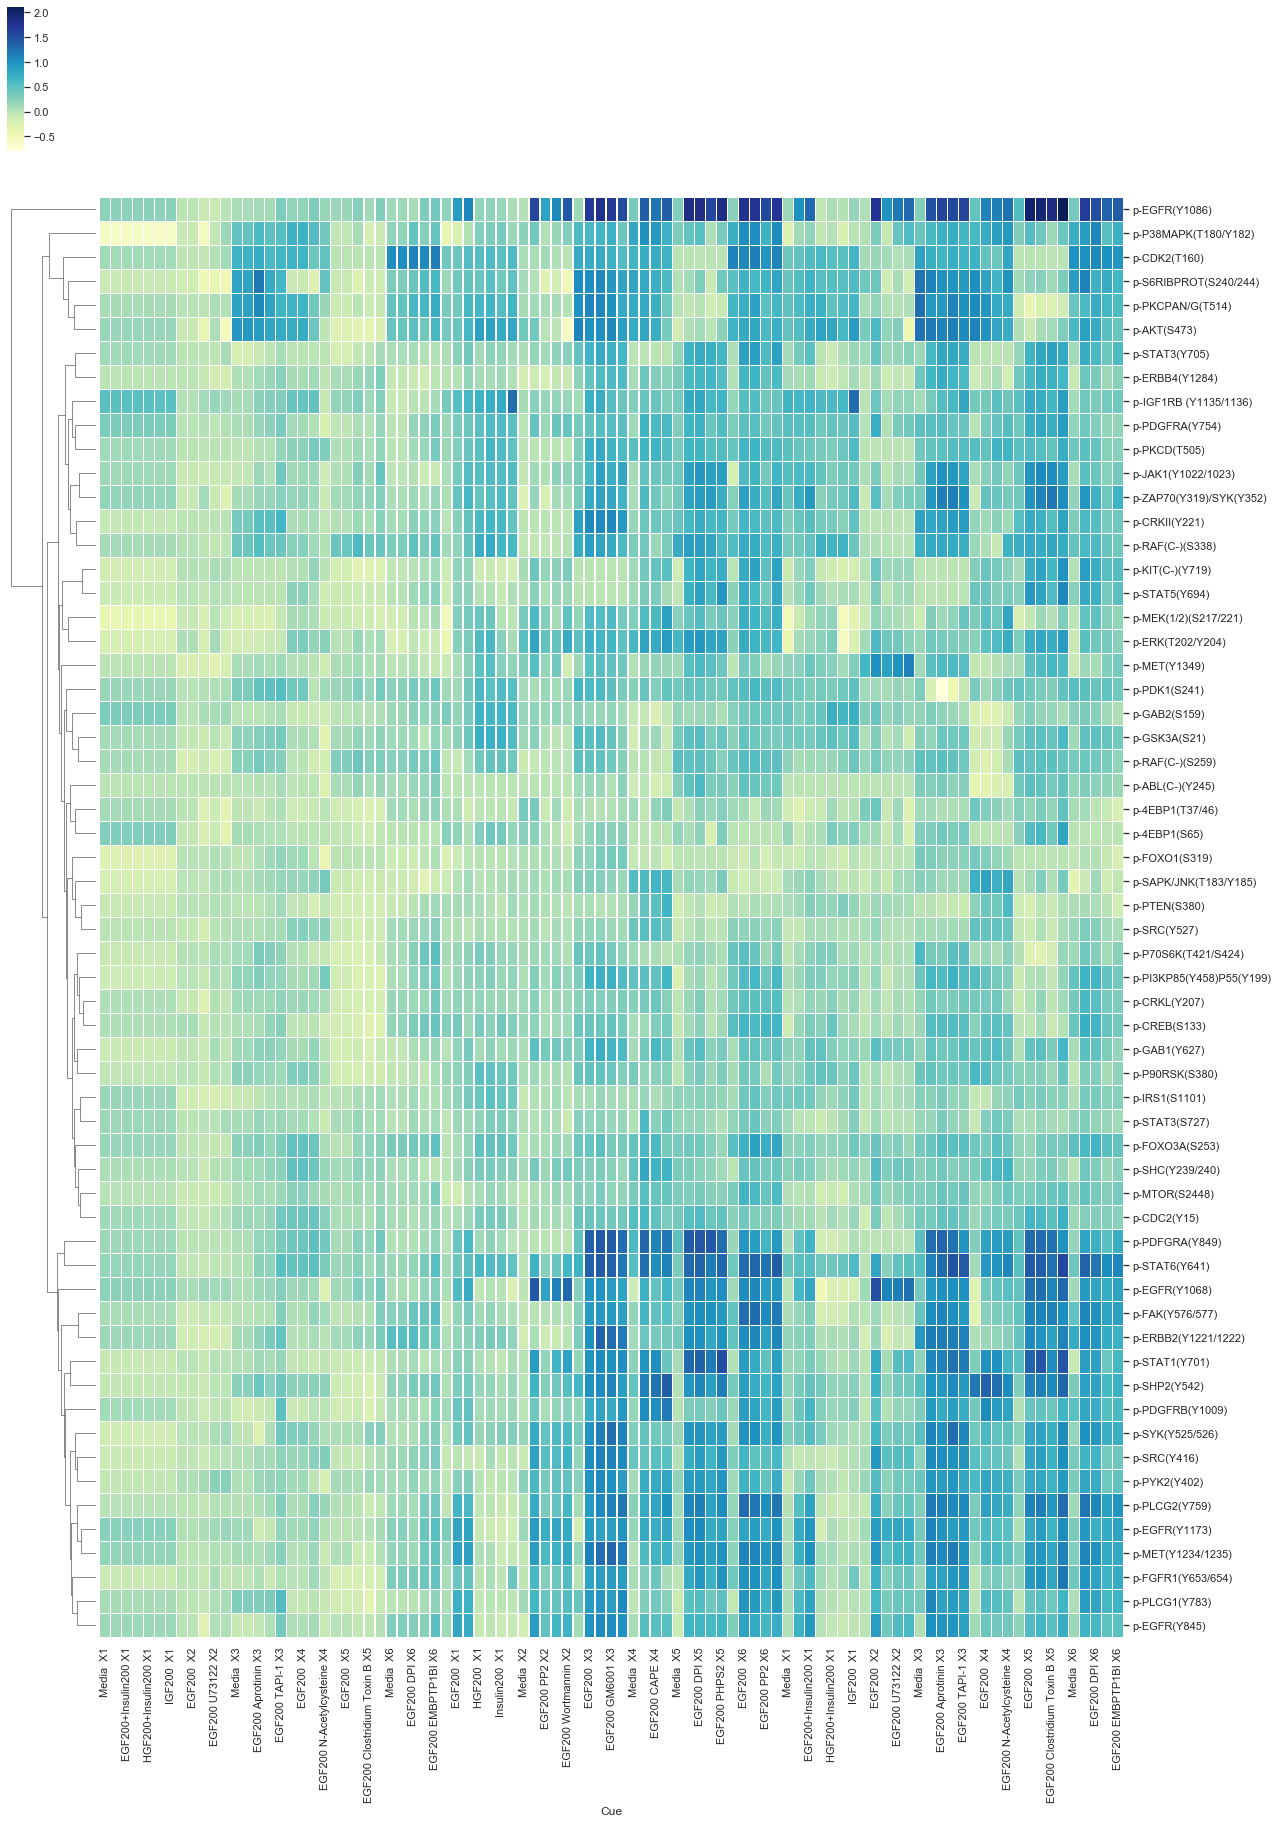

In [20]:
def plot_clustermap(microarray_dataframe):
    #one way of getting all your proteins into a list
    proteins = [col for col in microarray_dataframe if col.startswith('p-')]
    dataframe = microarray_dataframe.set_index('Cue', 'Time')
    dataframe = dataframe[proteins]
    sns.clustermap(dataframe.astype('float64').transpose(), col_cluster=False, cmap='YlGnBu',
                   linewidths=.1, figsize=(20,30))
    plt.show()

plot_clustermap(time_based_microarray_data)

### To help you organize, you can put your project plans for part 1 here:



-----

Question: 

Objective: 

Method: 

Analysis: 


-----




In [26]:
# Put code for part 1 here

### To help you organize, you can put your project plans for part 2 here:



-----

Question: 

Objective: 

Method: 

Analysis: 


-----


In [25]:
# Put code for part 2 here